Dataset shape: (350085, 67)

Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_

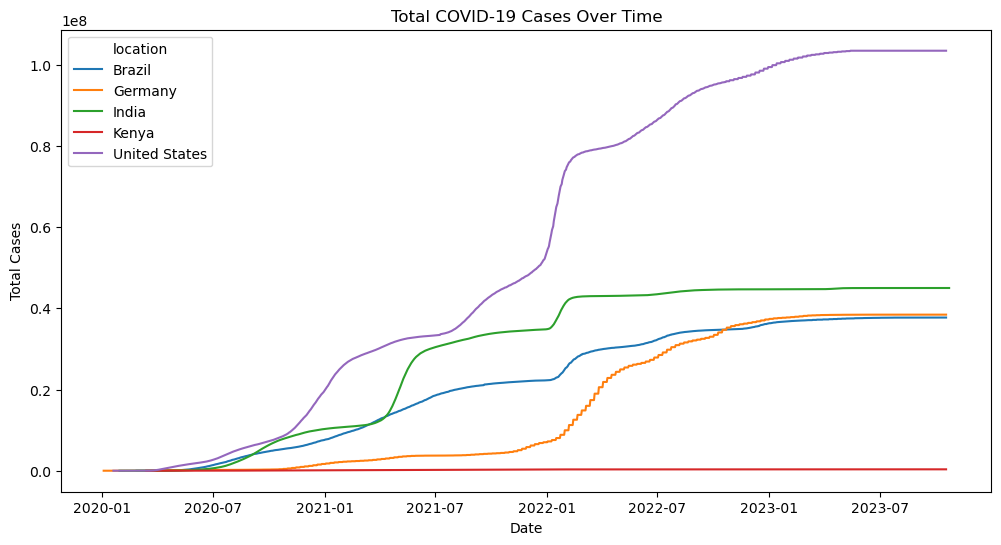

C:\Users\DG\AppData\Local\Temp\ipykernel_14884\4096752941.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['death_rate'] = (clean_df['total_deaths'] / clean_df['total_cases']) * 100


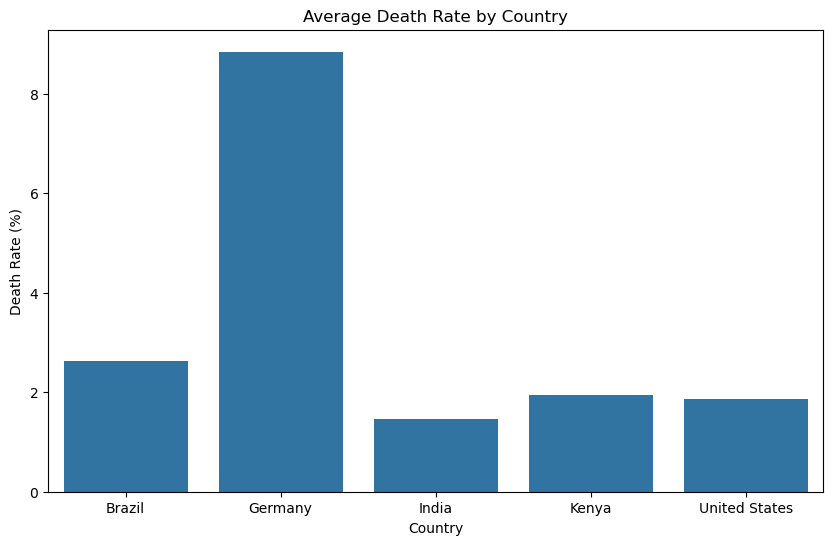

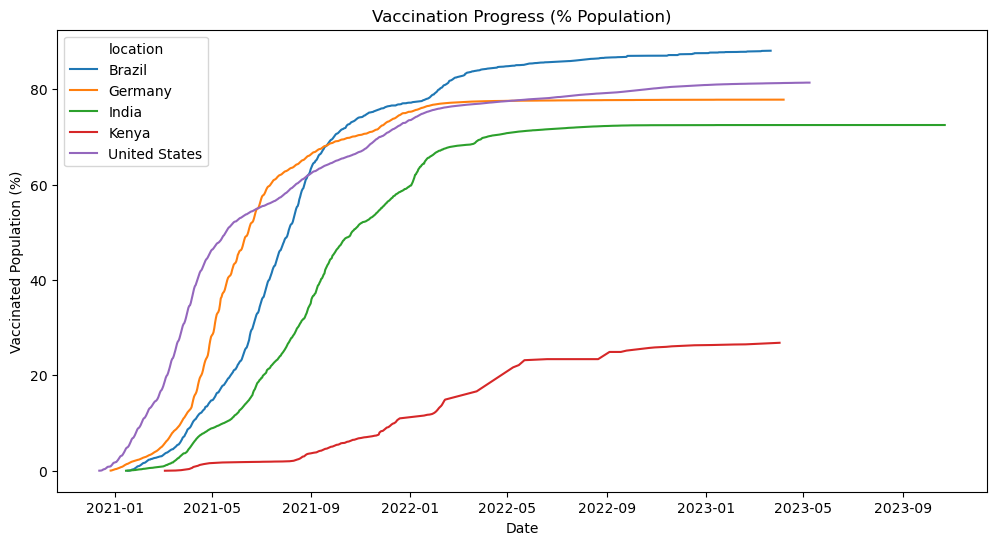

In [1]:
# %% [markdown]
# # COVID-19 Global Trends Analysis
# ## Data Analysis Report

# %%
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# %% [markdown]
# ## 1. Data Loading & Exploration

# %%
# Load dataset
covid_df = pd.read_csv('owid-covid-data.csv')

# Initial exploration
print("Dataset shape:", covid_df.shape)
print("\nColumns:", covid_df.columns.tolist())
print("\nMissing values per column:")
print(covid_df.isnull().sum().sort_values(ascending=False).head(10))

# %%
# Preview data
covid_df[['date', 'location', 'total_cases', 'total_deaths', 'people_vaccinated']].head()

# %% [markdown]
# ## 2. Data Cleaning

# %%
# Filter countries of interest
countries = ['Kenya', 'United States', 'India', 'Germany', 'Brazil']
filtered_df = covid_df[covid_df['location'].isin(countries)].copy()

# Convert date column
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Handle missing values
cols_to_fill = ['total_cases', 'total_deaths', 'people_vaccinated']
filtered_df[cols_to_fill] = filtered_df.groupby('location')[cols_to_fill].ffill()

# Remove rows with missing critical values
clean_df = filtered_df.dropna(subset=['total_cases', 'date'])

# %% [markdown]
# ## 3. Exploratory Data Analysis (EDA)

# %%
# Time trends for cases and deaths
plt.figure(figsize=(12, 6))
sns.lineplot(data=clean_df, x='date', y='total_cases', hue='location')
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.show()

# %%
# Death rate analysis
clean_df['death_rate'] = (clean_df['total_deaths'] / clean_df['total_cases']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(data=clean_df.groupby('location')['death_rate'].mean().reset_index(),
            x='location', y='death_rate')
plt.title('Average Death Rate by Country')
plt.xlabel('Country')
plt.ylabel('Death Rate (%)')
plt.show()

# %% [markdown]
# ## 4. Vaccination Progress

# %%
# Vaccination trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=clean_df, x='date', y='people_vaccinated_per_hundred', hue='location')
plt.title('Vaccination Progress (% Population)')
plt.xlabel('Date')
plt.ylabel('Vaccinated Population (%)')
plt.show()

# %% [markdown]
# ## 5. Choropleth Map (Global View)

# %%
# Prepare data for choropleth
latest_data = covid_df[covid_df['date'] == covid_df['date'].max()]
choropleth_df = latest_data[['iso_code', 'location', 'total_cases_per_million']].dropna()

# Create interactive map
fig = px.choropleth(choropleth_df,
                    locations="iso_code",
                    color="total_cases_per_million",
                    hover_name="location",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Global COVID-19 Case Density (per million people)")
fig.show()

# %% [markdown]
# ## 6. Key Insights
# **1. Vaccination Disparities:** Developed countries like the US and Germany showed faster vaccination rollouts compared to developing nations like Kenya.
# 
# **2. Death Rate Variations:** Countries with better healthcare infrastructure demonstrated lower average death rates despite high case numbers.
# 
# **3. Case Trends:** Brazil and India experienced significant infection waves correlating with virus variant emergences.
# 
# **4. Global Distribution:** Case density remains highest in North America and Europe based on per-million population analysis.